# Data cleaning and processing

In [1]:
import pandas as pd
from IPython.display import Image, display

## Descriptive statistics of raw (hourly) measurements

After gathering data from the **OpenAQ API**, we proceed by cerating a table of **descriptive statistics** for raw measurements, divided by city, year, parameter and station.

In [2]:
pd.read_csv("../../data/descriptive/pre_cleaning_descriptive.csv")

,city,parameter,station_name,count,mean,std,min,25%,50%,75%,max
0,Firenze,no2 µg/m³,FI-BASSI,24780.0,16.565799,14.363181,-1.0,6.0,12.0,22.0,337.0
1,Firenze,no2 µg/m³,FI-GRAMSCI,9237.0,38.880535,19.432080,-1.0,24.0,37.0,52.0,470.0
2,Firenze,no2 µg/m³,FI-MOSSE,27216.0,30.690329,15.893121,-1.0,19.0,28.0,40.0,259.0
3,Firenze,no2 µg/m³,FI-SCANDICCI,24456.0,18.047514,14.272662,-1.0,7.0,14.0,24.0,237.0
4,Firenze,no2 µg/m³,FI-SETTIGNANO,24831.0,5.098506,5.923560,-1.0,2.0,3.0,6.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...
126,Torino,o3 µg/m³,Borgaro T. - Caduti,29525.0,49.150246,38.087773,-4.0,15.0,44.0,74.0,197.0
127,Torino,o3 µg/m³,Torino - Rubino,29451.0,52.200638,54.739019,-1.0,12.0,43.0,79.0,801.0
128,Torino,o3 µg/m³,Torino Lingotto,9410.0,55.132094,36.402044,-1.0,25.0,54.0,80.0,162.0
129,Torino,pm10 µg/m³,Torino - Rubino,18079.0,22.946374,21.983848,-487.0,10.0,19.0,31.0,1340.0


In the table can notice some *negative* values and some *extremely high* implausible values, which we adress by dropping rows with values < 0 or > of some limit value defined in config.yml.
<br> Moreover, we performed some basic cleaning of duplicates and NA values.

## Sensors quality

We begin by assessing sensors quality using two complentary metrics.

An important side of data quality we addressed is **sensors' percent coverage of daily measurements**: to ensure a reliable 24h measure there should be enough avaiable measurements troughout the day. <br>
Regarding sensors quality, we also calculated each **sensors' days avaiables troughout the year**. Such data is particulraly important when calculating yearly average values. <br> 
We subsequently **filtered** as **invalid sensors** the ones with **less than 60% days avaiables** and less than **30% average daily coverage**. <br>
The table presents the exact values for the two statistics, along with the **valid sensor** tag. Invalid sensors were excluded from subsequent analysis

In [3]:
pd.read_csv("../../results/quality_checks/sensors_quality.csv")

,year,city,parameter,station_name,sensor_id,mean_sensor_percent_coverage_per_day,sensors_percent_coverage_per_year,valid_sensor
0,2021,Firenze,no2 µg/m³,FI-BASSI,24526,87.37,86.85,True
1,2021,Firenze,no2 µg/m³,FI-MOSSE,24528,88.19,90.41,True
2,2021,Firenze,no2 µg/m³,FI-SCANDICCI,24392,87.46,90.14,True
3,2021,Firenze,no2 µg/m³,FI-SETTIGNANO,23963,87.00,88.22,True
4,2021,Firenze,o3 µg/m³,FI-SETTIGNANO,23964,87.67,89.59,True
...,...,...,...,...,...,...,...,...
495,2025,Torino,o3 µg/m³,Borgaro T. - Caduti,24476,82.79,92.33,True
496,2025,Torino,o3 µg/m³,Torino - Rubino,24820,83.05,93.15,True
497,2025,Torino,o3 µg/m³,Torino Lingotto,7772972,82.86,91.23,True
498,2025,Torino,pm10 µg/m³,Torino - Rubino,1764647,74.61,60.82,True


## Cities quality and flags

We also addressed the issue of data quality for cities, using two other meaningful metrics, and given the already limited coverage, decided to assigne flags corresponfing to different levels of reliability. <br>
The first metric that was chosen for assessing data quality was the **number of active sensors** in a given city and year. In the plot below we can generally see how the number of active sensors changes between cities and troughout the years, with some cities (particularly Rome) having a lot and others relying on a single sensor.

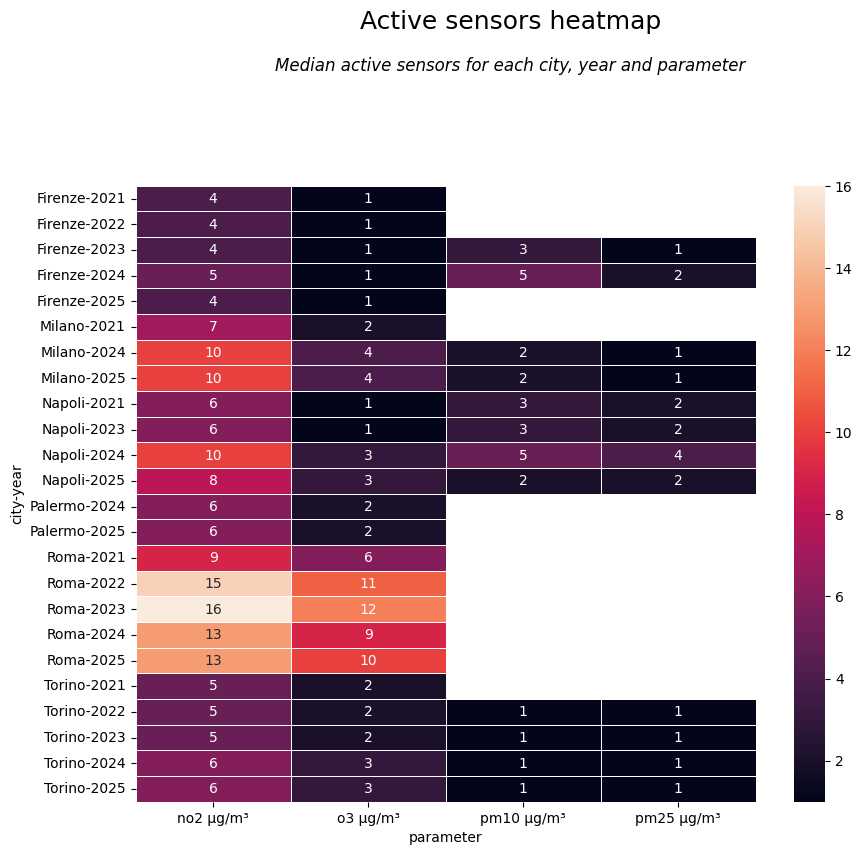

In [4]:
display(Image(filename="../../results/quality_checks/figures/median_active_sensors_heatmap.png", width=600))

Finally, another metric was chosen for its importance when evaluating yearly aggregate measures: the **percentage of avaiable days** for each given year. In the plot we can see how generally their number is sufficient for such evaluation, while on the other hand there is a lack data as entire years are completely unavaible for some paramters and cities.

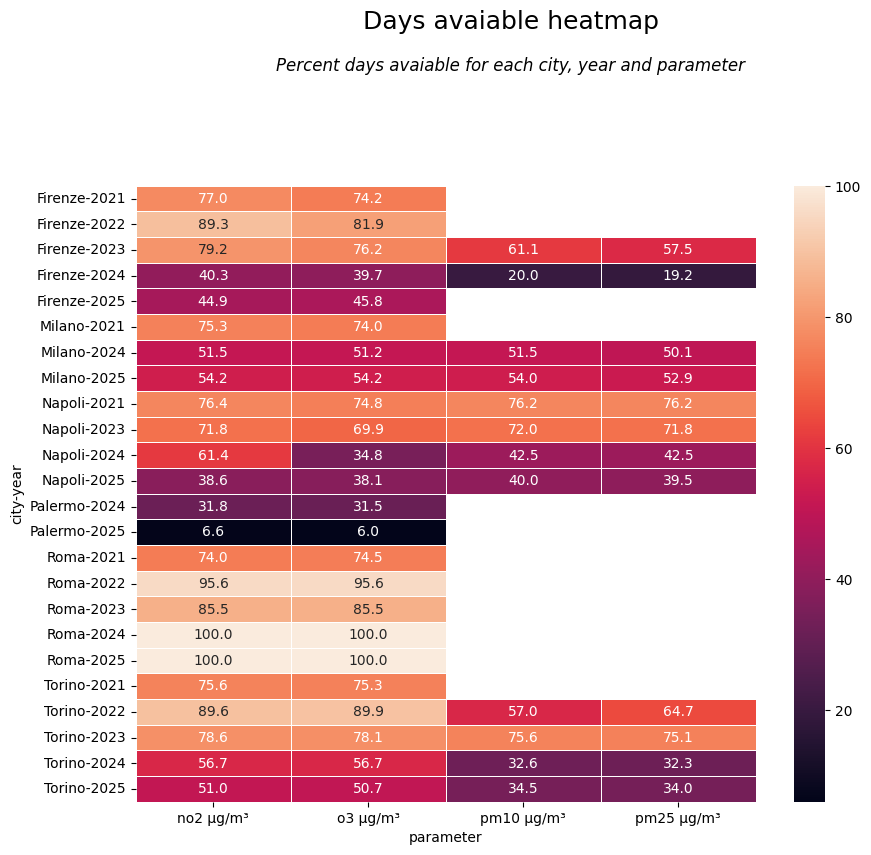

In [5]:
display(Image(filename="../../results/quality_checks/figures/days_avaiable_heatmap.png", width=600))

In the table below we report exact number of these metrics, along with the quality flag we associated for each parameter in a given year for a given city. <br> The **flagging rules** used were: <br>

**High**     -->     >= 80 days avaiable     --AND--     >= 3 median active sensors per day <br>
**Medium**   -->     >= 70 days avaiable     --AND--     >= 2 median active sensors per day <br>
**Low**      -->     >= 60 days avaiable     --AND--     >= 2 median active sensors per day <br>
**Very Low** -->     <  60 days avaiable     ---OR--      < 2 median active sensors per day <br>

In [6]:
pd.read_csv("../../results/quality_checks/cities_quality.csv")

,city,year,parameter,year_median_active_sensors_per_city_parameter,percent_days_avaiable_per_city_year,flag_city_parameter
0,Firenze,2021,no2 µg/m³,4.0,76.99,Medium
1,Firenze,2021,o3 µg/m³,1.0,74.25,Low
2,Firenze,2022,no2 µg/m³,4.0,89.32,High
3,Firenze,2022,o3 µg/m³,1.0,81.92,Low
4,Firenze,2023,no2 µg/m³,4.0,79.18,Medium
...,...,...,...,...,...,...
67,Torino,2024,pm25 µg/m³,1.0,32.33,Very Low
68,Torino,2025,no2 µg/m³,6.0,50.96,Low
69,Torino,2025,o3 µg/m³,3.0,50.68,Low
70,Torino,2025,pm10 µg/m³,1.0,34.52,Very Low
